## **Test 1: Commute Mode Analysis within the SACOG Region, 2018-2022**
#### by: Sandra J. Garren, Ph.D.


This Jupyter Notebook provides the workflow to complete Test 1 for the Data Analyst position at the Sacramento Council of Government (SACOG). The python scripts are presented logically in the order presented in the Table of Contents. The objectives of Test 1 are as follows:

- Write a python script to download data from the US Census API.
- Demonstrate knowledge of US Census data (i.e., American Community Survey vs. Dicenniel Census).
- Generate data visualizations to answer the following two research questions:
    1. What is the trend of Drive Alone to commute from Year 2018-2022?
    2. What is the trend of Work From Home from Year 2018-2022?
- Communicate insights from the data.

### Census Data Selection Rational

To achieve the goal of this test, American Community Survey: 5-year estimates (acs5) was selected rather than using the 1-year estimates (acs1). There are benefits to using each dataset. For example, the acs1 provides more up-to-date results given that the data was collected from one year and not averaged over five years as in acs5. However, acs1 is applicable for populations over 65,000 given the smaller sample size used in the estimate. The acs5 provides more reliable estimates for smaller populations and would be better to understand geographices with lower populations (e.g., the worker population estimate in Sutter County in 2022 was 41,767. A second reason to use acs5 is that the estimate for acs1 in 2020 is not provided due to problems with data collection during the COVID pandemic and comparing across different programs (i.e., 2020 decennial census) is not advisable. While acs5 is less current than acs1, the test is to evaluate the trends across a five year period, so even though the values may be somewhat behind, we are able to see the trend throughout the five year period, including 2020 which is an important year to understand how the COVID pandemic has influenced commuting patterns. (For more about differences, see https://www.census.gov/programs-surveys/acs/guidance/estimates.html.) 

Census data were extracted from the Census API (https://www.census.gov/data/developers/data-sets.html) using the Discovery Tool from the American Community Survey: 5-Year Estimates: Subject Tables for calendar years 2018, 2019, 2020, 2021, and 2022. Data were pulled from S0101 (Total Population) and from S0802 (Means of Transportation to Work by Selected Characteristics) for the six counties contained within the SACOG region. The analysis only scratches the surface of what is possible to learn about commute trends. For example, demographic data (age, sex, race, and earned income) is cross-tabbed for the means of transportation (e.g., drive alone, carpool, public transportation, and those that don't work from home). The demographic data for those that work from home is not directly available but can be derived from the other data provided in S0802. I look forward to communicating the results of this initial commute trend analysis.

### Load Python Libraries

In [2]:
import requests
import pandas as pd
import numpy as np
import plotly.express as px
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### 2022 Data Set

Each of the five years were pulled from the Census API and loaded into a dataframe. Each year's data was formatted the same way so that they could be concatenated into one dataset. The columns headers and the census county names were renamed. A year column was added and three additional columns were calculated ('Work from Home', 'Percent Drove Alone', and 'Percent Work from Home') since they were not directly contained in the subject data set. 

In [3]:
url_22D="https://api.census.gov/data/2022/acs/acs5/subject?get=NAME,S0101_C01_001E,S0802_C01_001E,S0802_C02_001E,S0802_C03_001E,S0802_C04_001E,S0802_C01_070E&for=county:017,061,067,101,113,115&in=state:06"
response22D = requests.request("Get", url_22D)
print(response22D.text)
data_22D=response22D.json()

[["NAME","S0101_C01_001E","S0802_C01_001E","S0802_C02_001E","S0802_C03_001E","S0802_C04_001E","S0802_C01_070E","state","county"],
["El Dorado County, California","191713","86127","60894","6610","591","71077","06","017"],
["Placer County, California","406608","187335","134286","11802","1284","152396","06","061"],
["Sacramento County, California","1579211","727094","508032","69107","12250","618700","06","067"],
["Sutter County, California","99101","41767","31965","5391","279","38879","06","101"],
["Yolo County, California","217141","100577","66155","7776","3000","85917","06","113"],
["Yuba County, California","81705","33422","26528","3765","177","31276","06","115"]]


In [4]:
df_22D=pd.DataFrame(data_22D[1:], columns=data_22D[0]).\
rename(columns={"S0101_C01_001E":"Population", "S0802_C01_001E":"Workers","S0802_C02_001E":"Drove Alone","S0802_C03_001E":"Carpool","S0802_C04_001E":"Transit","S0802_C01_070E":"Workers_NWH"})
df_22D['Year']='2022'
df_22D=df_22D.replace(', California','', regex=True)
df_22D=df_22D.astype(dtype={'Population':'int64','Workers':'int64','Drove Alone':'int64','Carpool':'int64','Transit':'int64','Workers_NWH':'int64'})
df_22D['Work from Home']=df_22D['Workers'] - df_22D['Workers_NWH']
df_22D['Percent Drove Alone']=df_22D['Drove Alone']/df_22D['Workers']*100
df_22D['Percent Work from Home']=df_22D['Work from Home']/df_22D['Workers']*100
df_22D

,NAME,Population,Workers,Drove Alone,Carpool,Transit,Workers_NWH,state,county,Year,Work from Home,Percent Drove Alone,Percent Work from Home
0,El Dorado County,191713,86127,60894,6610,591,71077,06,017,2022,15050,70.702567,17.474195
1,Placer County,406608,187335,134286,11802,1284,152396,06,061,2022,34939,71.682280,18.650546
2,Sacramento County,1579211,727094,508032,69107,12250,618700,06,067,2022,108394,69.871571,14.907839
3,Sutter County,99101,41767,31965,5391,279,38879,06,101,2022,2888,76.531712,6.914550
4,Yolo County,217141,100577,66155,7776,3000,85917,06,113,2022,14660,65.775476,14.575897
5,Yuba County,81705,33422,26528,3765,177,31276,06,115,2022,2146,79.372868,6.420920


In [5]:
#double check that the data types were converted properly
df_22D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NAME                    6 non-null      object 
 1   Population              6 non-null      int64  
 2   Workers                 6 non-null      int64  
 3   Drove Alone             6 non-null      int64  
 4   Carpool                 6 non-null      int64  
 5   Transit                 6 non-null      int64  
 6   Workers_NWH             6 non-null      int64  
 7   state                   6 non-null      object 
 8   county                  6 non-null      object 
 9   Year                    6 non-null      object 
 10  Work from Home          6 non-null      int64  
 11  Percent Drove Alone     6 non-null      float64
 12  Percent Work from Home  6 non-null      float64
dtypes: float64(2), int64(7), object(4)
memory usage: 756.0+ bytes


### 2021 Data Set

In [6]:
url_21D="https://api.census.gov/data/2021/acs/acs5/subject?get=NAME,S0101_C01_001E,S0802_C01_001E,S0802_C02_001E,S0802_C03_001E,S0802_C04_001E,S0802_C01_070E&for=county:017,061,067,101,113,115&in=state:06"
response21D = requests.request("Get", url_21D)
print(response21D.text)
data_21D=response21D.json()

[["NAME","S0101_C01_001E","S0802_C01_001E","S0802_C02_001E","S0802_C03_001E","S0802_C04_001E","S0802_C01_070E","state","county"],
["El Dorado County, California","190568","85493","62157","7009","803","72595","06","017"],
["Placer County, California","400330","183134","136528","11052","1603","153502","06","061"],
["Sacramento County, California","1571767","715334","516666","68377","14418","628001","06","067"],
["Sutter County, California","99080","41164","31997","5015","345","38426","06","101"],
["Yolo County, California","216703","99145","65426","8413","3576","86749","06","113"],
["Yuba County, California","80404","32181","25805","3497","201","30427","06","115"]]


In [7]:
df_21D=pd.DataFrame(data_21D[1:], columns=data_21D[0]).\
rename(columns={"S0101_C01_001E":"Population", "S0802_C01_001E":"Workers","S0802_C02_001E":"Drove Alone","S0802_C03_001E":"Carpool","S0802_C04_001E":"Transit","S0802_C01_070E":"Workers_NWH"})
df_21D['Year']='2021'
df_21D=df_21D.replace(', California','', regex=True)
df_21D=df_21D.astype(dtype={'Population':'int64','Workers':'int64','Drove Alone':'int64','Carpool':'int64','Transit':'int64','Workers_NWH':'int64'})
df_21D['Work from Home']=df_21D['Workers'] - df_21D['Workers_NWH']
df_21D['Percent Drove Alone']=df_21D['Drove Alone']/df_21D['Workers']*100
df_21D['Percent Work from Home']=df_21D['Work from Home']/df_21D['Workers']*100
df_21D

,NAME,Population,Workers,Drove Alone,Carpool,Transit,Workers_NWH,state,county,Year,Work from Home,Percent Drove Alone,Percent Work from Home
0,El Dorado County,190568,85493,62157,7009,803,72595,06,017,2021,12898,72.704198,15.086615
1,Placer County,400330,183134,136528,11052,1603,153502,06,061,2021,29632,74.550875,16.180502
2,Sacramento County,1571767,715334,516666,68377,14418,628001,06,067,2021,87333,72.227239,12.208703
3,Sutter County,99080,41164,31997,5015,345,38426,06,101,2021,2738,77.730541,6.651443
4,Yolo County,216703,99145,65426,8413,3576,86749,06,113,2021,12396,65.990216,12.502900
5,Yuba County,80404,32181,25805,3497,201,30427,06,115,2021,1754,80.187067,5.450421


### 2020 Data Set

In [8]:
url_20D="https://api.census.gov/data/2020/acs/acs5/subject?get=NAME,S0101_C01_001E,S0802_C01_001E,S0802_C02_001E,S0802_C03_001E,S0802_C04_001E,S0802_C01_070E&for=county:017,061,067,101,113,115&in=state:06"
response20D = requests.request("Get", url_20D)
print(response20D.text)
data_20D=response20D.json()

[["NAME","S0101_C01_001E","S0802_C01_001E","S0802_C02_001E","S0802_C03_001E","S0802_C04_001E","S0802_C01_070E","state","county"],
["El Dorado County, California","190345","84184","63951","6679","926","74397","06","017"],
["Placer County, California","391799","180064","138851","11718","1830","156648","06","061"],
["Sacramento County, California","1537948","699223","523805","69115","15579","636309","06","067"],
["Sutter County, California","96315","39908","31213","4813","404","37409","06","101"],
["Yolo County, California","218774","98248","66449","8812","4097","88939","06","113"],
["Yuba County, California","77524","30960","24737","3582","175","29309","06","115"]]


In [9]:
df_20D=pd.DataFrame(data_20D[1:], columns=data_20D[0]).\
rename(columns={"S0101_C01_001E":"Population", "S0802_C01_001E":"Workers","S0802_C02_001E":"Drove Alone","S0802_C03_001E":"Carpool","S0802_C04_001E":"Transit","S0802_C01_070E":"Workers_NWH"})
df_20D['Year']='2020'
df_20D=df_20D.replace(', California','', regex=True)
df_20D=df_20D.astype(dtype={'Population':'int64','Workers':'int64','Drove Alone':'int64','Carpool':'int64','Transit':'int64','Workers_NWH':'int64'})
df_20D['Work from Home']=df_20D['Workers'] - df_20D['Workers_NWH']
df_20D['Percent Drove Alone']=df_20D['Drove Alone']/df_20D['Workers']*100
df_20D['Percent Work from Home']=df_20D['Work from Home']/df_20D['Workers']*100
df_20D

,NAME,Population,Workers,Drove Alone,Carpool,Transit,Workers_NWH,state,county,Year,Work from Home,Percent Drove Alone,Percent Work from Home
0,El Dorado County,190345,84184,63951,6679,926,74397,06,017,2020,9787,75.965742,11.625725
1,Placer County,391799,180064,138851,11718,1830,156648,06,061,2020,23416,77.112027,13.004265
2,Sacramento County,1537948,699223,523805,69115,15579,636309,06,067,2020,62914,74.912439,8.997702
3,Sutter County,96315,39908,31213,4813,404,37409,06,101,2020,2499,78.212388,6.261902
4,Yolo County,218774,98248,66449,8812,4097,88939,06,113,2020,9309,67.633947,9.475002
5,Yuba County,77524,30960,24737,3582,175,29309,06,115,2020,1651,79.899871,5.332687


### 2019 Data Set

In [10]:
url_19D="https://api.census.gov/data/2019/acs/acs5/subject?get=NAME,S0101_C01_001E,S0802_C01_001E,S0802_C02_001E,S0802_C03_001E,S0802_C04_001E,S0802_C01_070E&for=county:017,061,067,101,113,115&in=state:06"
response19D = requests.request("Get", url_19D)
print(response19D.text)
data_19D=response19D.json()

[["NAME","S0101_C01_001E","S0802_C01_001E","S0802_C02_001E","S0802_C03_001E","S0802_C04_001E","S0802_C01_070E","state","county"],
["Sacramento County, California","1524553","689904","532218","69407","17063","646569","06","067"],
["El Dorado County, California","188563","83461","64203","7229","1204","75549","06","017"],
["Placer County, California","385512","175805","139680","12085","1906","158348","06","061"],
["Sutter County, California","96109","38584","30449","4903","285","36769","06","101"],
["Yuba County, California","76360","30628","24383","3565","288","29109","06","115"],
["Yolo County, California","217352","97220","67195","9549","4068","91410","06","113"]]


In [11]:
df_19D=pd.DataFrame(data_19D[1:], columns=data_19D[0]).\
rename(columns={"S0101_C01_001E":"Population", "S0802_C01_001E":"Workers","S0802_C02_001E":"Drove Alone","S0802_C03_001E":"Carpool","S0802_C04_001E":"Transit","S0802_C01_070E":"Workers_NWH"})
df_19D['Year']='2019'
df_19D=df_19D.replace(', California','', regex=True)
df_19D=df_19D.astype(dtype={'Population':'int64','Workers':'int64','Drove Alone':'int64','Carpool':'int64','Transit':'int64','Workers_NWH':'int64'})
df_19D['Work from Home']=df_19D['Workers'] - df_19D['Workers_NWH']
df_19D['Percent Drove Alone']=df_19D['Drove Alone']/df_19D['Workers']*100
df_19D['Percent Work from Home']=df_19D['Work from Home']/df_19D['Workers']*100
df_19D

,NAME,Population,Workers,Drove Alone,Carpool,Transit,Workers_NWH,state,county,Year,Work from Home,Percent Drove Alone,Percent Work from Home
0,Sacramento County,1524553,689904,532218,69407,17063,646569,06,067,2019,43335,77.143777,6.281309
1,El Dorado County,188563,83461,64203,7229,1204,75549,06,017,2019,7912,76.925750,9.479877
2,Placer County,385512,175805,139680,12085,1906,158348,06,061,2019,17457,79.451665,9.929752
3,Sutter County,96109,38584,30449,4903,285,36769,06,101,2019,1815,78.916131,4.704022
4,Yuba County,76360,30628,24383,3565,288,29109,06,115,2019,1519,79.610161,4.959514
5,Yolo County,217352,97220,67195,9549,4068,91410,06,113,2019,5810,69.116437,5.976137


### 2018 Data Set

In [12]:
url_18D="https://api.census.gov/data/2018/acs/acs5/subject?get=NAME,S0101_C01_001E,S0802_C01_001E,S0802_C02_001E,S0802_C03_001E,S0802_C04_001E,S0802_C01_070E&for=county:017,061,067,101,113,115&in=state:06"
response18D = requests.request("Get", url_18D)
print(response18D.text)
data_18D=response18D.json()

[["NAME","S0101_C01_001E","S0802_C01_001E","S0802_C02_001E","S0802_C03_001E","S0802_C04_001E","S0802_C01_070E","state","county"],
["El Dorado County, California","186661","81390","62437","6889","1385","73617","06","017"],
["Sacramento County, California","1510023","671083","519425","67985","17270","631848","06","067"],
["Placer County, California","380077","170441","135558","12484","1988","154842","06","061"],
["Sutter County, California","95872","38011","30141","4465","338","36156","06","101"],
["Yuba County, California","75493","29756","23226","3832","281","28297","06","115"],
["Yolo County, California","214977","95318","64973","9407","3961","90114","06","113"]]


In [13]:
df_18D=pd.DataFrame(data_18D[1:], columns=data_18D[0]).\
rename(columns={"S0101_C01_001E":"Population", "S0802_C01_001E":"Workers","S0802_C02_001E":"Drove Alone","S0802_C03_001E":"Carpool","S0802_C04_001E":"Transit","S0802_C01_070E":"Workers_NWH"})
df_18D=df_18D.astype(dtype={'Population':'int64','Workers':'int64','Drove Alone':'int64','Carpool':'int64','Transit':'int64','Workers_NWH':'int64'})
df_18D['Year']='2018'
df_18D=df_18D.replace(', California','', regex=True)
df_18D['Work from Home']=df_18D['Workers'] - df_18D['Workers_NWH']
df_18D['Percent Drove Alone']=df_18D['Drove Alone']/df_18D['Workers']*100
df_18D['Percent Work from Home']=df_18D['Work from Home']/df_18D['Workers']*100
df_18D

,NAME,Population,Workers,Drove Alone,Carpool,Transit,Workers_NWH,state,county,Year,Work from Home,Percent Drove Alone,Percent Work from Home
0,El Dorado County,186661,81390,62437,6889,1385,73617,06,017,2018,7773,76.713355,9.550313
1,Sacramento County,1510023,671083,519425,67985,17270,631848,06,067,2018,39235,77.401007,5.846520
2,Placer County,380077,170441,135558,12484,1988,154842,06,061,2018,15599,79.533680,9.152141
3,Sutter County,95872,38011,30141,4465,338,36156,06,101,2018,1855,79.295467,4.880166
4,Yuba County,75493,29756,23226,3832,281,28297,06,115,2018,1459,78.054846,4.903213
5,Yolo County,214977,95318,64973,9407,3961,90114,06,113,2018,5204,68.164460,5.459619


### Concatenate into one Master Dataset

In [14]:
df_commute=pd.concat([df_22D,df_21D,df_20D,df_19D,df_18D])
df_commute

,NAME,Population,Workers,Drove Alone,Carpool,Transit,Workers_NWH,state,county,Year,Work from Home,Percent Drove Alone,Percent Work from Home
0,El Dorado County,191713,86127,60894,6610,591,71077,06,017,2022,15050,70.702567,17.474195
1,Placer County,406608,187335,134286,11802,1284,152396,06,061,2022,34939,71.682280,18.650546
2,Sacramento County,1579211,727094,508032,69107,12250,618700,06,067,2022,108394,69.871571,14.907839
3,Sutter County,99101,41767,31965,5391,279,38879,06,101,2022,2888,76.531712,6.914550
4,Yolo County,217141,100577,66155,7776,3000,85917,06,113,2022,14660,65.775476,14.575897
5,Yuba County,81705,33422,26528,3765,177,31276,06,115,2022,2146,79.372868,6.420920
0,El Dorado County,190568,85493,62157,7009,803,72595,06,017,2021,12898,72.704198,15.086615
1,Placer County,400330,183134,136528,11052,1603,153502,06,061,2021,29632,74.550875,16.180502
2,Sacramento County,1571767,715334,516666,68377,14418,628001,06,067,2021,87333,72.227239,12.208703
3,Sutter County,99080,41164,31997,5015,345,38426,06,101,2021,2738,77.730541,6.651443


In [15]:
df_commute.to_csv('out.csv')

### Total Number of Workers by County

Now that the data is together in one place, data exploration and data visualizations are prepared. Starting with Trends in Total Workers by County.

In [16]:
#Created a pivot table to look at the total number of workers for all six counties
df_TotalWorkers=pd.pivot_table(df_commute,values='Workers', index='Year', columns='NAME')
df_TotalWorkers['6 County Total']=df_TotalWorkers['El Dorado County']+df_TotalWorkers['Placer County']+df_TotalWorkers['Sacramento County']+df_TotalWorkers['Sutter County']+df_TotalWorkers['Yolo County']+df_TotalWorkers['Yuba County']
df_TotalWorkers

NAME,El Dorado County,Placer County,Sacramento County,Sutter County,Yolo County,Yuba County,6 County Total
Year,,,,,,,
2018,81390.0,170441.0,671083.0,38011.0,95318.0,29756.0,1085999.0
2019,83461.0,175805.0,689904.0,38584.0,97220.0,30628.0,1115602.0
2020,84184.0,180064.0,699223.0,39908.0,98248.0,30960.0,1132587.0
2021,85493.0,183134.0,715334.0,41164.0,99145.0,32181.0,1156451.0
2022,86127.0,187335.0,727094.0,41767.0,100577.0,33422.0,1176322.0


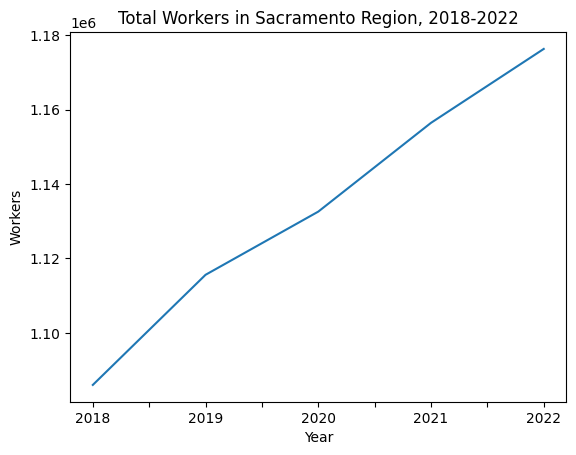

In [17]:
df_6County=df_TotalWorkers['6 County Total']
df_6County.plot(kind='line')

plt.title('Total Workers in Sacramento Region, 2018-2022')
plt.ylabel('Workers')
plt.show()

In [18]:
#This isn't a particularly interesting chart; however, it does not look like the pandemic has changed the trajectory of the total number of workers. 
#Compare the total population growth to the total worker growth in the report.

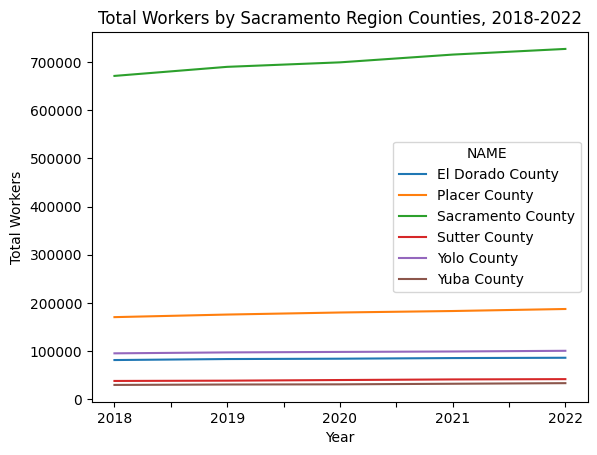

In [19]:
df_WorkersbyCounty=pd.pivot_table(df_commute,values='Workers', index='Year', columns='NAME')
df_WorkersbyCounty.plot(kind='line')

plt.title('Total Workers by Sacramento Region Counties, 2018-2022')
plt.ylabel('Total Workers')
plt.show()

In [20]:
#It is hard to read from this graph differences in the increase in workers. 

In [21]:
#Calculate the percent increase from 2018 to 2022 for all counties plus overall
df_workers=pd.pivot_table(df_commute, values = 'Workers', index='NAME',columns='Year')
dfworkersTotal=df_workers
dfworkersTotal=pd.concat([dfworkersTotal,pd.DataFrame(dfworkersTotal.sum(axis=0),columns=['Six County Total']).T])
dfworkersTotal['Percent Change']=(dfworkersTotal['2022']-dfworkersTotal['2018'])/dfworkersTotal['2018']*100
dfworkersTotal

Year,2018,2019,2020,2021,2022,Percent Change
El Dorado County,81390.0,83461.0,84184.0,85493.0,86127.0,5.820125
Placer County,170441.0,175805.0,180064.0,183134.0,187335.0,9.911934
Sacramento County,671083.0,689904.0,699223.0,715334.0,727094.0,8.346360
Sutter County,38011.0,38584.0,39908.0,41164.0,41767.0,9.881350
Yolo County,95318.0,97220.0,98248.0,99145.0,100577.0,5.517321
Yuba County,29756.0,30628.0,30960.0,32181.0,33422.0,12.320204
Six County Total,1085999.0,1115602.0,1132587.0,1156451.0,1176322.0,8.317043


In [22]:
#Let's see how much the workers have increased from 2018 to 2022 in each county and as a whole
dfworkersPercent=dfworkersTotal['Percent Change']
dfworkersPercent

El Dorado County      5.820125
Placer County         9.911934
Sacramento County     8.346360
Sutter County         9.881350
Yolo County           5.517321
Yuba County          12.320204
Six County Total      8.317043
Name: Percent Change, dtype: float64

Text(0, 0.5, 'Percent')

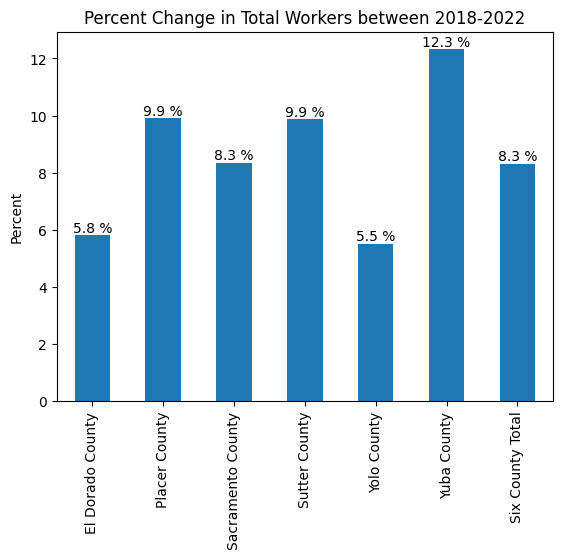

In [23]:
ax = dfworkersPercent.plot.bar(x='NAME', y='Percent Change', legend=False)
ax.bar_label(ax.containers[0], fmt='{:.1f} %')

ax.set_title('Percent Change in Total Workers between 2018-2022') 

#Setting up the Labels
ax.set_ylabel('Percent')

### Drove Alone 

In [24]:
#first, let's find out how many workers drive alone in total and by county and the percent change from 2018 to 2022

In [25]:
#Created a pivot table to look at the total number of commuters who Drove Alone for all six counties
df_TotalDA=pd.pivot_table(df_commute,values='Drove Alone', index='Year', columns='NAME')
df_TotalDA['6 County Total']=df_TotalDA['El Dorado County']+df_TotalDA['Placer County']+df_TotalDA['Sacramento County']+df_TotalDA['Sutter County']+df_TotalDA['Yolo County']+df_TotalDA['Yuba County']
df_TotalDA

NAME,El Dorado County,Placer County,Sacramento County,Sutter County,Yolo County,Yuba County,6 County Total
Year,,,,,,,
2018,62437.0,135558.0,519425.0,30141.0,64973.0,23226.0,835760.0
2019,64203.0,139680.0,532218.0,30449.0,67195.0,24383.0,858128.0
2020,63951.0,138851.0,523805.0,31213.0,66449.0,24737.0,849006.0
2021,62157.0,136528.0,516666.0,31997.0,65426.0,25805.0,838579.0
2022,60894.0,134286.0,508032.0,31965.0,66155.0,26528.0,827860.0


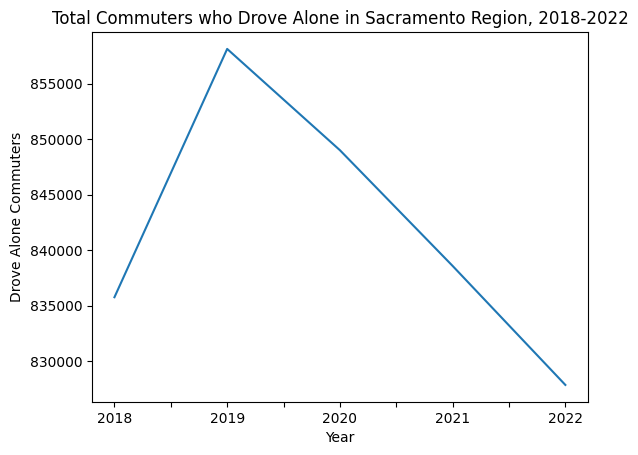

In [26]:
df_6CountyDA=df_TotalDA['6 County Total']
df_6CountyDA.plot(kind='line')

plt.title('Total Commuters who Drove Alone in Sacramento Region, 2018-2022')
plt.ylabel('Drove Alone Commuters')
plt.show()

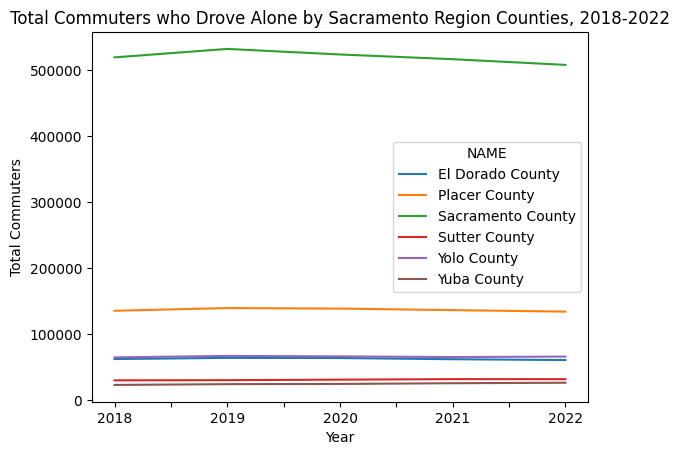

In [27]:
df_DACounty=pd.pivot_table(df_commute,values='Drove Alone', index='Year', columns='NAME')
df_DACounty.plot(kind='line')

plt.title('Total Commuters who Drove Alone by Sacramento Region Counties, 2018-2022')
plt.ylabel('Total Commuters')
plt.show()

In [28]:
#Total Commuters who Drive Alone
df_drovealoneT=pd.pivot_table(df_commute, values = 'Drove Alone', index ='NAME', columns='Year')
df_drovealoneT=pd.concat([df_drovealoneT,pd.DataFrame(df_drovealoneT.sum(axis=0),columns=['Total']).T])
df_drovealoneT['Percent Change']=(df_drovealoneT['2022']-df_drovealoneT['2018'])/df_drovealoneT['2018']*100
df_drovealoneT

Year,2018,2019,2020,2021,2022,Percent Change
El Dorado County,62437.0,64203.0,63951.0,62157.0,60894.0,-2.471291
Placer County,135558.0,139680.0,138851.0,136528.0,134286.0,-0.938344
Sacramento County,519425.0,532218.0,523805.0,516666.0,508032.0,-2.193387
Sutter County,30141.0,30449.0,31213.0,31997.0,31965.0,6.051558
Yolo County,64973.0,67195.0,66449.0,65426.0,66155.0,1.819217
Yuba County,23226.0,24383.0,24737.0,25805.0,26528.0,14.216826
Total,835760.0,858128.0,849006.0,838579.0,827860.0,-0.945247


In [29]:
df_DAPC=df_drovealoneT['Percent Change']
df_DAPC

El Dorado County     -2.471291
Placer County        -0.938344
Sacramento County    -2.193387
Sutter County         6.051558
Yolo County           1.819217
Yuba County          14.216826
Total                -0.945247
Name: Percent Change, dtype: float64

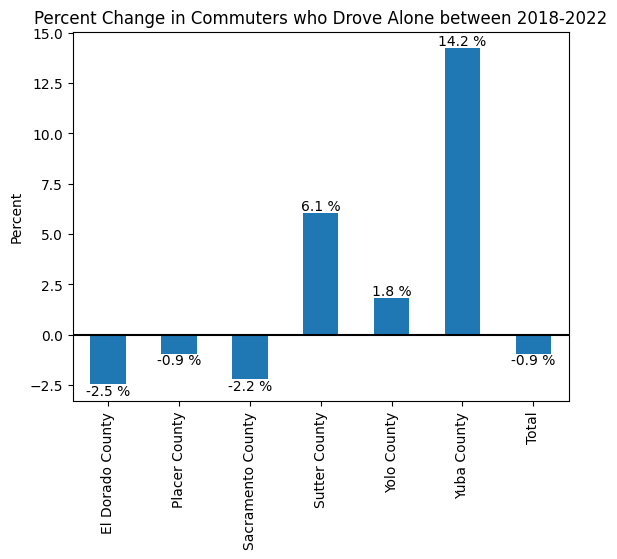

In [30]:
ax = df_DAPC.plot.bar(x='NAME', y='Percent Change', legend=False)
ax.bar_label(ax.containers[0], fmt='{:.1f} %')

ax.set_title('Percent Change in Commuters who Drove Alone between 2018-2022') 
ax.set_ylabel('Percent')
plt.axhline(y=0, color='black')

In [31]:
df_PDATCounty=pd.pivot_table(df_commute,values='Percent Drove Alone', index='Year', columns='NAME')
df_PDATCounty

NAME,El Dorado County,Placer County,Sacramento County,Sutter County,Yolo County,Yuba County
Year,,,,,,
2018,76.713355,79.533680,77.401007,79.295467,68.164460,78.054846
2019,76.925750,79.451665,77.143777,78.916131,69.116437,79.610161
2020,75.965742,77.112027,74.912439,78.212388,67.633947,79.899871
2021,72.704198,74.550875,72.227239,77.730541,65.990216,80.187067
2022,70.702567,71.682280,69.871571,76.531712,65.775476,79.372868


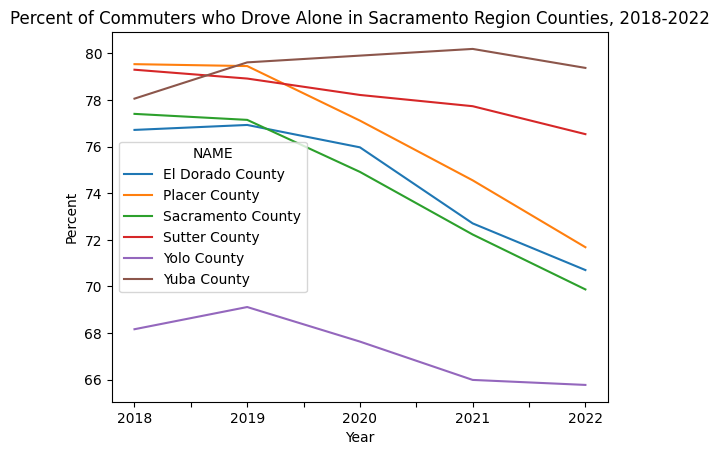

In [32]:
df_PDATCounty.plot(kind='line')

plt.title('Percent of Commuters who Drove Alone in Sacramento Region Counties, 2018-2022')
plt.ylabel('Percent')

plt.show()

In [33]:
df_PDATCountyP=pd.pivot_table(df_commute,values='Percent Drove Alone', index='NAME', columns='Year')
df_PDATCountyP['Percent Change']=(df_PDATCountyP['2022']-df_PDATCountyP['2018'])/df_PDATCountyP['2018']*100
df_PDATCountyP

Year,2018,2019,2020,2021,2022,Percent Change
NAME,,,,,,
El Dorado County,76.713355,76.925750,75.965742,72.704198,70.702567,-7.835387
Placer County,79.533680,79.451665,77.112027,74.550875,71.682280,-9.871792
Sacramento County,77.401007,77.143777,74.912439,72.227239,69.871571,-9.727827
Sutter County,79.295467,78.916131,78.212388,77.730541,76.531712,-3.485389
Yolo County,68.164460,69.116437,67.633947,65.990216,65.775476,-3.504736
Yuba County,78.054846,79.610161,79.899871,80.187067,79.372868,1.688585


In [34]:
df_CountyPDATPC=df_PDATCountyP['Percent Change']
df_CountyPDATPC

NAME
El Dorado County    -7.835387
Placer County       -9.871792
Sacramento County   -9.727827
Sutter County       -3.485389
Yolo County         -3.504736
Yuba County          1.688585
Name: Percent Change, dtype: float64

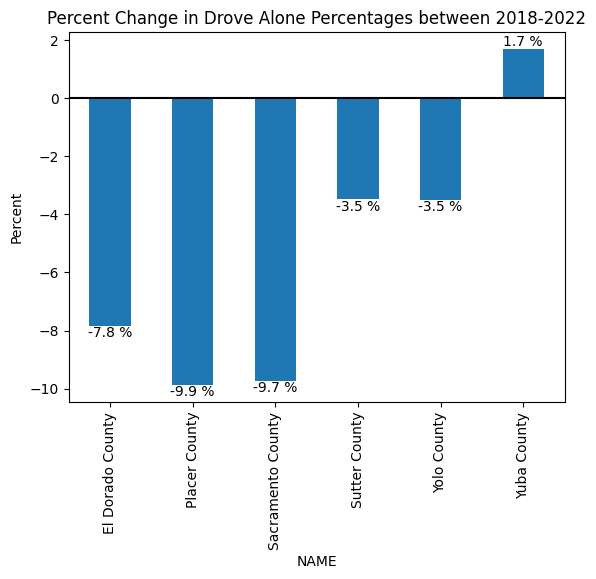

In [35]:
ax = df_CountyPDATPC.plot.bar(x='NAME', y='Percent Change', legend=False)
ax.bar_label(ax.containers[0], fmt='{:.1f} %')

ax.set_title('Percent Change in Drove Alone Percentages between 2018-2022') 
ax.set_ylabel('Percent')
plt.axhline(y=0, color='black')

### Work from Home

In [36]:
#Created a pivot table to look at the total number of workers work from home for all six counties
df_TotalWH=pd.pivot_table(df_commute,values='Work from Home', index='Year', columns='NAME')
df_TotalWH['6 County Total']=df_TotalWH['El Dorado County']+df_TotalWH['Placer County']+df_TotalWH['Sacramento County']+df_TotalWH['Sutter County']+df_TotalWH['Yolo County']+df_TotalWH['Yuba County']
df_TotalWH

NAME,El Dorado County,Placer County,Sacramento County,Sutter County,Yolo County,Yuba County,6 County Total
Year,,,,,,,
2018,7773.0,15599.0,39235.0,1855.0,5204.0,1459.0,71125.0
2019,7912.0,17457.0,43335.0,1815.0,5810.0,1519.0,77848.0
2020,9787.0,23416.0,62914.0,2499.0,9309.0,1651.0,109576.0
2021,12898.0,29632.0,87333.0,2738.0,12396.0,1754.0,146751.0
2022,15050.0,34939.0,108394.0,2888.0,14660.0,2146.0,178077.0


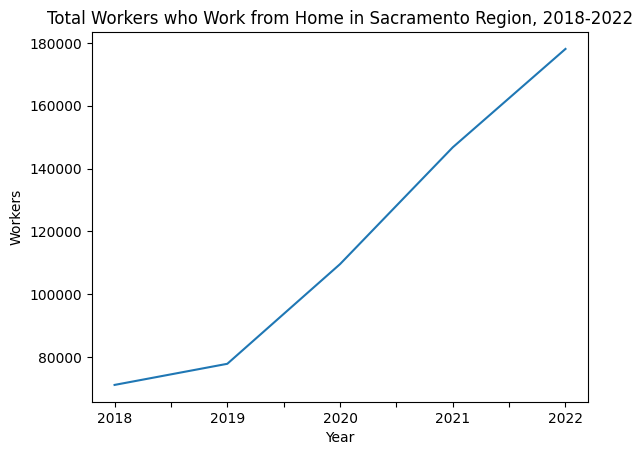

In [37]:
df_6CountyWH=df_TotalWH['6 County Total']
df_6CountyWH.plot(kind='line')

plt.title('Total Workers who Work from Home in Sacramento Region, 2018-2022')
plt.ylabel('Workers')
plt.show()

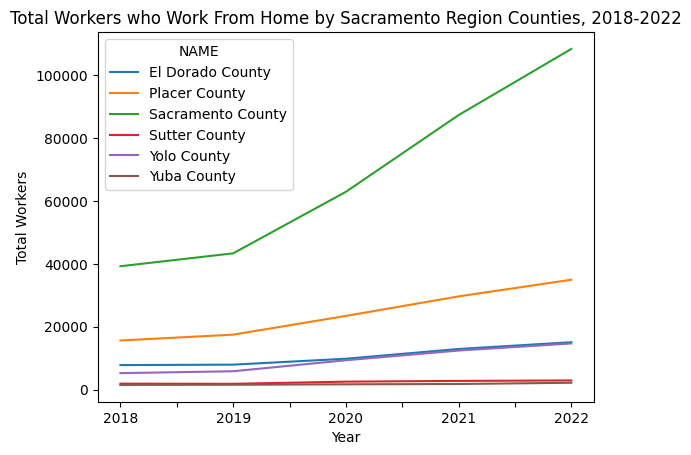

In [38]:
df_WHCounty=pd.pivot_table(df_commute,values='Work from Home', index='Year', columns='NAME')
df_WHCounty.plot(kind='line')

plt.title('Total Workers who Work From Home by Sacramento Region Counties, 2018-2022')
plt.ylabel('Total Workers')
plt.show()

In [39]:
#Total Work from Home
df_WHT=pd.pivot_table(df_commute, values = 'Work from Home', index ='NAME', columns='Year')
df_WHT=pd.concat([df_WHT,pd.DataFrame(df_WHT.sum(axis=0),columns=['Total']).T])
df_WHT['Percent Change']=(df_WHT['2022']-df_WHT['2018'])/df_WHT['2018']*100
df_WHT

Year,2018,2019,2020,2021,2022,Percent Change
El Dorado County,7773.0,7912.0,9787.0,12898.0,15050.0,93.618937
Placer County,15599.0,17457.0,23416.0,29632.0,34939.0,123.982307
Sacramento County,39235.0,43335.0,62914.0,87333.0,108394.0,176.268638
Sutter County,1855.0,1815.0,2499.0,2738.0,2888.0,55.687332
Yolo County,5204.0,5810.0,9309.0,12396.0,14660.0,181.706380
Yuba County,1459.0,1519.0,1651.0,1754.0,2146.0,47.087046
Total,71125.0,77848.0,109576.0,146751.0,178077.0,150.371880


In [40]:
df_WHTPC=df_WHT['Percent Change']
df_WHTPC

El Dorado County      93.618937
Placer County        123.982307
Sacramento County    176.268638
Sutter County         55.687332
Yolo County          181.706380
Yuba County           47.087046
Total                150.371880
Name: Percent Change, dtype: float64

Text(0, 0.5, 'Percent')

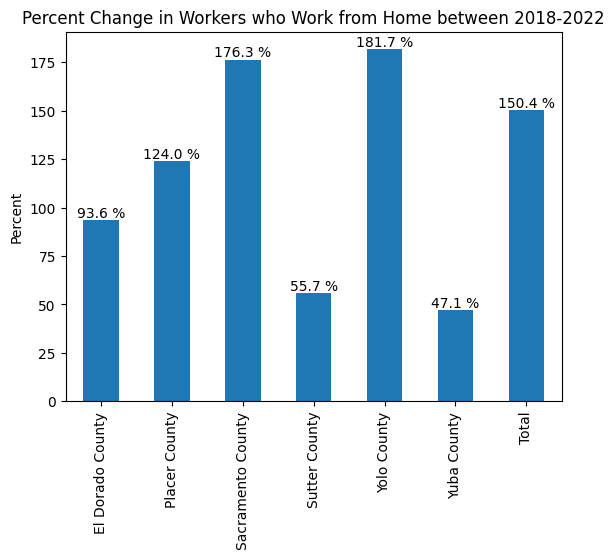

In [41]:
ax = df_WHTPC.plot.bar(x='NAME', y='Percent Change', legend=False)
ax.bar_label(ax.containers[0], fmt='{:.1f} %')

ax.set_title('Percent Change in Workers who Work from Home between 2018-2022') 
ax.set_ylabel('Percent')

In [42]:
df_WHPercent=pd.pivot_table(df_commute,values='Percent Work from Home', index='Year', columns='NAME')
df_WHPercent

NAME,El Dorado County,Placer County,Sacramento County,Sutter County,Yolo County,Yuba County
Year,,,,,,
2018,9.550313,9.152141,5.846520,4.880166,5.459619,4.903213
2019,9.479877,9.929752,6.281309,4.704022,5.976137,4.959514
2020,11.625725,13.004265,8.997702,6.261902,9.475002,5.332687
2021,15.086615,16.180502,12.208703,6.651443,12.502900,5.450421
2022,17.474195,18.650546,14.907839,6.914550,14.575897,6.420920


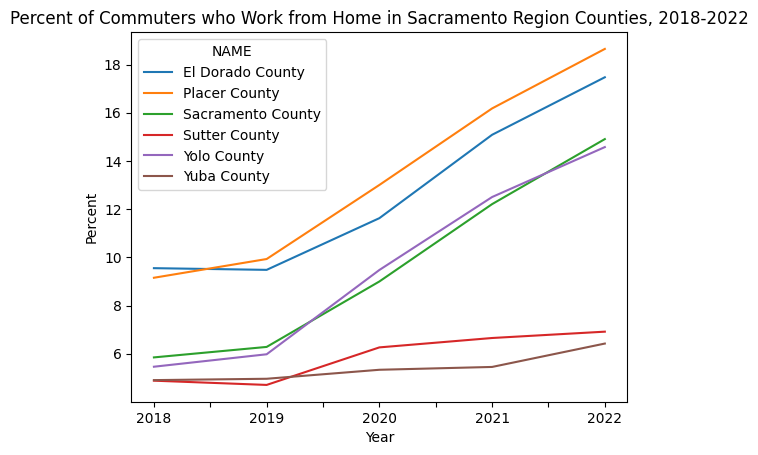

In [43]:
df_WHPercent.plot(kind='line')

plt.title('Percent of Commuters who Work from Home in Sacramento Region Counties, 2018-2022')
plt.ylabel('Percent')

plt.show()

In [44]:
df_WHPC=pd.pivot_table(df_commute, values = 'Percent Work from Home', index ='NAME', columns='Year')
df_WHPC['Percent Change']=(df_WHPC['2022']-df_WHPC['2018'])/df_WHPC['2018']*100
df_WHPC

Year,2018,2019,2020,2021,2022,Percent Change
NAME,,,,,,
El Dorado County,9.550313,9.479877,11.625725,15.086615,17.474195,82.969862
Placer County,9.152141,9.929752,13.004265,16.180502,18.650546,103.783427
Sacramento County,5.846520,6.281309,8.997702,12.208703,14.907839,154.986544
Sutter County,4.880166,4.704022,6.261902,6.651443,6.914550,41.686766
Yolo County,5.459619,5.976137,9.475002,12.502900,14.575897,166.976433
Yuba County,4.903213,4.959514,5.332687,5.450421,6.420920,30.953328


In [45]:
df_WHPCPC=df_WHPC['Percent Change']
df_WHPCPC

NAME
El Dorado County      82.969862
Placer County        103.783427
Sacramento County    154.986544
Sutter County         41.686766
Yolo County          166.976433
Yuba County           30.953328
Name: Percent Change, dtype: float64

Text(0, 0.5, 'Percent')

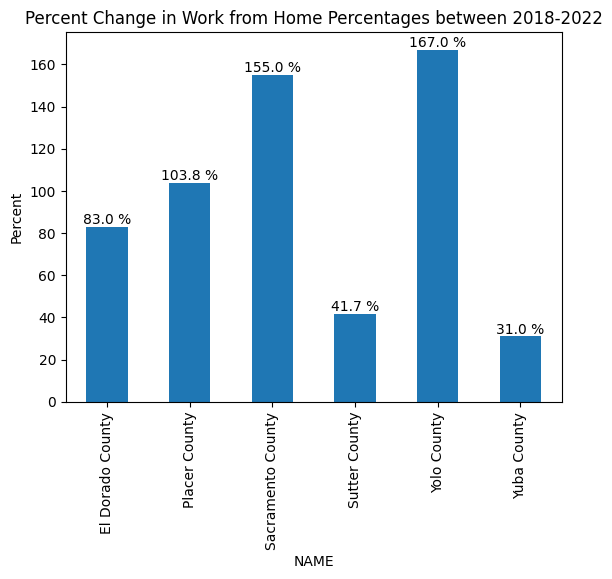

In [46]:
ax = df_WHPCPC.plot.bar(x='NAME', y='Percent Change', legend=False)
ax.bar_label(ax.containers[0], fmt='{:.1f} %')

ax.set_title('Percent Change in Work from Home Percentages between 2018-2022') 
ax.set_ylabel('Percent')